In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [3]:
df.shape

(301, 8)

In [4]:
df.isnull().sum()

S.NO                     0
Name                     0
Nationality              0
Current Rank             0
Previous Year Rank      24
Sport                    0
Year                     0
earnings ($ million)     0
dtype: int64

In [5]:
df.describe()

,S.NO,Current Rank,Year,earnings ($ million)
count,301.000000,301.000000,301.000000,301.000000
mean,151.000000,5.448505,2005.122924,45.516279
std,87.035433,2.850995,9.063563,33.525337
min,1.000000,1.000000,1990.000000,8.100000
25%,76.000000,3.000000,1997.000000,24.000000
50%,151.000000,5.000000,2005.000000,39.000000
75%,226.000000,8.000000,2013.000000,59.400000
max,301.000000,10.000000,2020.000000,300.000000


In [6]:
df[df['earnings ($ million)'] >= 300]

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
241,242,Floyd Mayweather,USA,1,1,Boxing,2015,300.0


In [7]:
df[df['earnings ($ million)'] <= 9]

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
5,6,Jack Nicklaus,USA,6,NaN,golf,1990,8.6
6,7,Greg Norman,Australia,7,NaN,golf,1990,8.5
7,8,Michael Jordan,USA,8,NaN,basketball,1990,8.1
8,9,Arnold Palmer,USA,8,NaN,golf,1990,8.1
9,10,Evander Holyfield,USA,8,NaN,boxing,1990,8.1
18,19,Nigel Mansell,UK,9,12,auto racing,1991,9.0
19,20,Sugar Ray Leonard,USA,10,6,golf,1991,8.5
28,29,Jim Courier,USA,9,>40,Tennis,1992,9.0
29,30,Monica Seles,USA,10,12,Tennis,1992,8.5


In [8]:
hi_year = df.groupby('Year').sum()
hi_year.sort_values('earnings ($ million)',ascending=False).head(7)

,S.NO,Current Rank,earnings ($ million)
Year,,,
2018,2765,55,1059.4
2015,2465,55,950.3
2019,2865,55,941.4
2020,2965,55,819.2
2014,2365,55,642.4
2016,2565,55,635.2
2017,2665,54,623.7


In [9]:
hi_year['change'] = hi_year.pct_change()['earnings ($ million)']*100

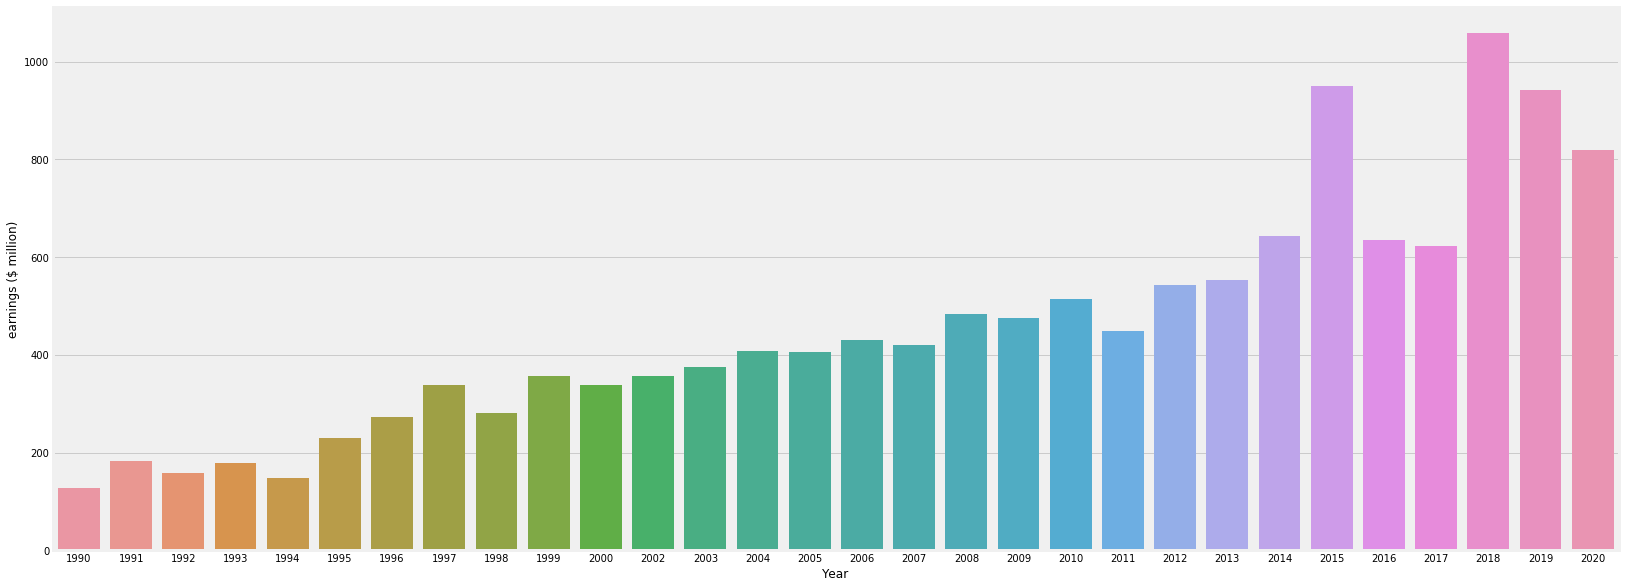

In [10]:
plt.figure(figsize=(25,10))
sns.barplot(x=hi_year.index, y='earnings ($ million)', data=hi_year)

In [11]:
df_n = df.groupby('Name').count()[['Year','S.NO']]
df_n['earning'] = df.groupby('Name').sum()['earnings ($ million)']
df_n['average'] = df_n.earning / df_n.Year
df_n = df_n.drop('S.NO',axis=1)
df_n = df_n.rename(columns={'Year':'count'})
df_n

,count,earning,average
Name,,,
Aaron Rodgers,1,49.0,49.000000
Aaron Rogers,1,89.3,89.300000
Alain Prost,3,36.0,12.000000
Alex Rodriguez,4,116.2,29.050000
Andre Agassi,6,105.8,17.633333
Andrew Luck,1,50.0,50.000000
Arnold Palmer,6,75.3,12.550000
Ayrton Senna,4,63.5,15.875000
Buster Douglas,1,26.0,26.000000


In [12]:
df_n.sort_values('count',ascending=False).head(7)

,count,earning,average
Name,,,
Michael Jordan,19,738.8,38.884211
Tiger Woods,19,1373.8,72.305263
Kobe Bryant,14,601.1,42.935714
LeBron James,13,844.8,64.984615
Michael Schumacher,13,639.0,49.153846
Roger Federer,12,781.1,65.091667
Phil Mickelson,11,519.9,47.263636


In [13]:
df_n.sort_values('average',ascending=False).head(7)

,count,earning,average
Name,,,
Floyd Mayweather,5,840.0,168.000000
Conor McGregor,1,99.0,99.000000
Neymar,3,290.5,96.833333
Canelo Alvarez,1,94.0,94.000000
Russell Wilson,1,89.5,89.500000
Aaron Rogers,1,89.3,89.300000
Lionel Messi,9,715.5,79.500000


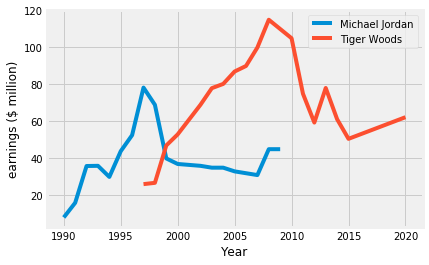

In [14]:
sns.lineplot(y=df[df.Name == 'Michael Jordan']['earnings ($ million)'], x=df[df.Name == 'Michael Jordan']['Year'], label='Michael Jordan')
sns.lineplot(y=df[df.Name == 'Tiger Woods']['earnings ($ million)'], x=df[df.Name == 'Tiger Woods']['Year'], label='Tiger Woods')

In [15]:
df.groupby('Sport').sum()

,S.NO,Current Rank,Year,earnings ($ million)
Sport,,,,
American Football,4018,130,34234,901.2
American Football / Baseball,53,3,1995,22.5
Auto Racing,718,57,19968,254.8
Auto Racing (Nascar),227,16,4002,44.5
Auto racing,33,3,1993,18.5
Baseball,256,25,5994,55.9
Basketball,8939,308,108353,2477.5
Boxing,3413,125,58048,1743.2
F1 Motorsports,454,13,9996,248.0


In [16]:
s_name = {'baseball' : 'Baseball', 'F1 Motorsports' : 'F1 racing', 'soccer' : 'Soccer', 'golf' : 'Golf',
          'basketball' : 'Basketball', 'boxing' : 'Boxing', 'auto racing':'Auto Racing',
         'Auto Racing (Nascar)':'Auto Racing', 'Auto racing':'Auto Racing', 'ice hockey':'Ice Hockey',
         'American Football / Baseball':'American Football','NASCAR':'Auto Racing','NFL':'American Football'}
df['Sport'] = df.Sport.replace(s_name)

In [17]:
df_s = df.groupby('Sport').count()[['Year','S.NO']]
df_s['earning'] = df.groupby('Sport').sum()['earnings ($ million)']
df_s['average'] = df_s.earning / df_s.Year
df_s = df_s.drop('S.NO',axis=1)
df_s = df_s.rename(columns={'Year':'count'})
df_s

,count,earning,average
Sport,,,
American Football,21,961.2,45.771429
Auto Racing,23,508.0,22.086957
Baseball,6,146.1,24.350000
Basketball,81,3418.1,42.198765
Boxing,46,2298.8,49.973913
F1 racing,13,645.0,49.615385
Golf,44,2136.5,48.556818
Hockey,1,17.9,17.900000
Ice Hockey,3,57.8,19.266667


In [18]:
df_s.sort_values('earning',ascending=False).head(7)

,count,earning,average
Sport,,,
Basketball,81,3418.1,42.198765
Boxing,46,2298.8,49.973913
Soccer,33,2223.5,67.378788
Golf,44,2136.5,48.556818
American Football,21,961.2,45.771429
Tennis,18,848.1,47.116667
F1 racing,13,645.0,49.615385


In [19]:
df_s.sort_values('average',ascending=False).head(7)

,count,earning,average
Sport,,,
MMA,1,99.0,99.000000
Soccer,33,2223.5,67.378788
Boxing,46,2298.8,49.973913
F1 racing,13,645.0,49.615385
Golf,44,2136.5,48.556818
Tennis,18,848.1,47.116667
American Football,21,961.2,45.771429


In [20]:
df.groupby('Nationality').sum().sort_values('earnings ($ million)', ascending=False)

,S.NO,Current Rank,Year,earnings ($ million)
Nationality,,,,
USA,28738,1145,412806,8786.3
Portugal,2499,39,20155,787.1
Switzerland,2882,59,24173,781.1
Argentina,2288,39,18143,715.5
Germany,1510,44,26023,639.0
UK,2028,88,26073,443.2
Brazil,1279,44,18038,422.0
Philippines,631,16,6034,242.0
Finland,526,11,6024,129.0


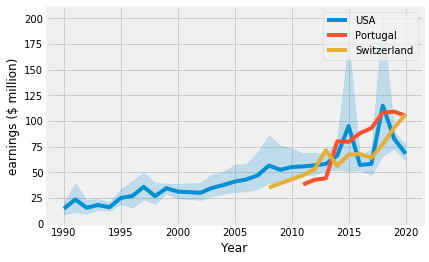

In [21]:
sns.lineplot(y=df[df.Nationality == 'USA']['earnings ($ million)'], x=df[df.Nationality == 'USA']['Year'], label='USA')
sns.lineplot(y=df[df.Nationality == 'Portugal']['earnings ($ million)'], x=df[df.Nationality == 'Portugal']['Year'], label='Portugal')
sns.lineplot(y=df[df.Nationality == 'Switzerland']['earnings ($ million)'], x=df[df.Nationality == 'Switzerland']['Year'], label='Switzerland')

In [22]:
df_2007 = df[df.Year > 2007]

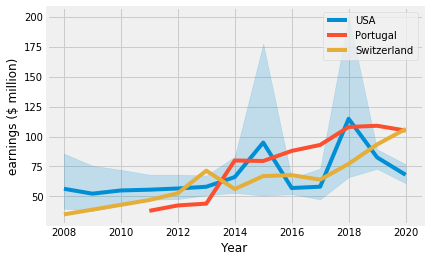

In [23]:
sns.lineplot(y=df_2007[df_2007.Nationality == 'USA']['earnings ($ million)'], x=df_2007[df_2007.Nationality == 'USA']['Year'], label='USA')
sns.lineplot(y=df_2007[df_2007.Nationality == 'Portugal']['earnings ($ million)'], x=df_2007[df_2007.Nationality == 'Portugal']['Year'], label='Portugal')
sns.lineplot(y=df_2007[df_2007.Nationality == 'Switzerland']['earnings ($ million)'], x=df_2007[df_2007.Nationality == 'Switzerland']['Year'], label='Switzerland')